In [158]:
import pandas as pd
# import seaborn as sns
import numpy as np
# import matplotlib.pyplot as plt



In [159]:
file_path = 'data.csv'

data = pd.read_csv(file_path)

data["sex"].replace(['male', 'female'], [0, 1], inplace=True)
data["smoker"].replace(['no', 'yes'], [0, 1],  inplace=True)
data_model = data.drop("region", axis=1)
print(data_model)




      age  sex     bmi  children  smoker      charges
0      19    1  27.900         0       1  16884.92400
1      18    0  33.770         1       0   1725.55230
2      28    0  33.000         3       0   4449.46200
3      33    0  22.705         0       0  21984.47061
4      32    0  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    0  30.970         3       0  10600.54830
1334   18    1  31.920         0       0   2205.98080
1335   18    1  36.850         0       0   1629.83350
1336   21    1  25.800         0       0   2007.94500
1337   61    1  29.070         0       1  29141.36030

[1338 rows x 6 columns]


In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data_model.dropna(axis=0, inplace=True)
# model = KNeighborsClassifier()
target = data_model['charges']

X = data_model.drop('charges', axis=1)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% pour train et 20% de test

# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coût: {mse}")
print(f"R-squared: {r2}")


Coût: 33979257.05080821
R-squared: 0.7811302113434095


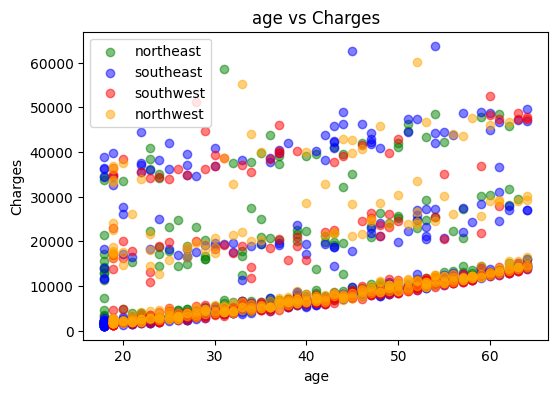

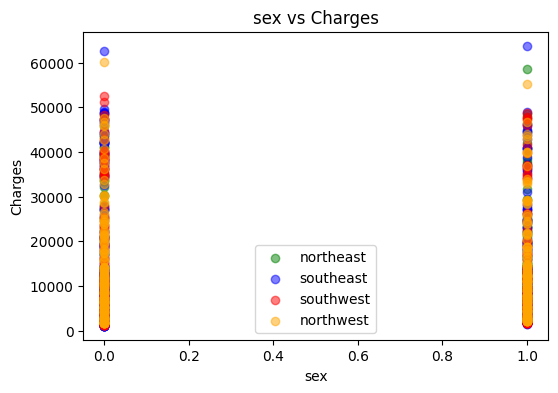

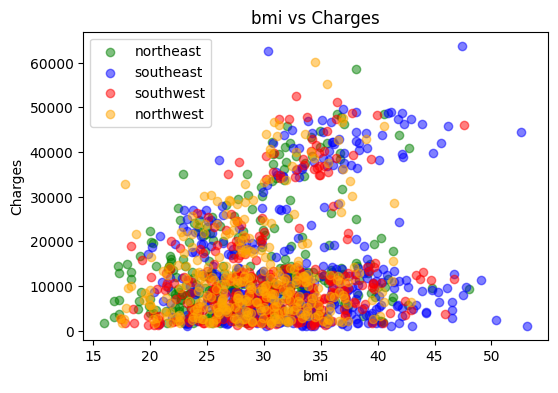

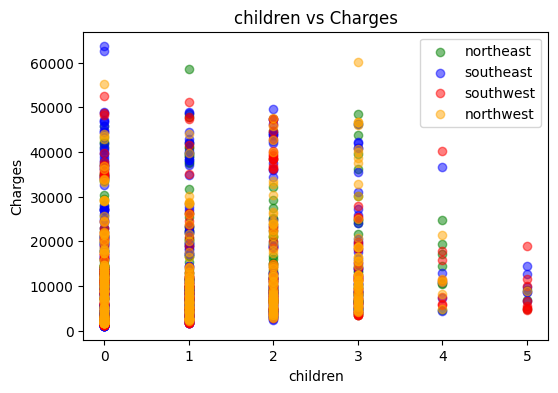

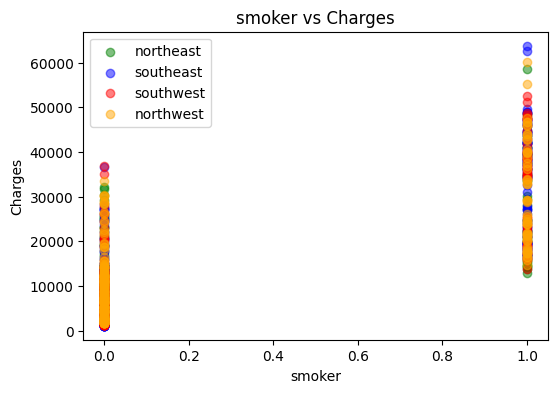

In [161]:
import matplotlib.pyplot as plt

# Supposons que X et y sont déjà définis

# Ajouter une colonne "color" pour la couleur associée à chaque région
colors = {'northeast': 'green', 'southeast': 'blue', 'southwest': 'red', 'northwest': 'orange'}
data['color'] = data['region'].map(colors)

# Obtenir les noms des colonnes de X
feature_names = X.columns

# Créer des nuages de points pour chaque colonne de X par rapport à y avec couleurs par région
for feature in feature_names:
    plt.figure(figsize=(6, 4))
    for region, color in colors.items():
        plt.scatter(X[data['region'] == region][feature], y[data['region'] == region], label=region, color=color, alpha=0.5)
    plt.title(f'{feature} vs Charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.legend()
    plt.show()